In [2]:
#필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as gs

In [49]:
#데이터셋 읽기
stress = pd.read_csv('sleep_stress.csv')
stress_f = stress.copy()
stress_f.columns = ["snoring_rage", "respiration_rate", "body_temperature", "limb_movement_rate", "blood_oxygen_levels", "eye_movement", "number_of_hours_of_sleep", "heart_rate","Stress_Levels" ] 

In [5]:
#데이터프레임 좀 더 예쁘게 나오게끔 만들기 (피피티용)
def deco_table(styler):
    styler.set_properties(color="black", align="center")
    styler.set_properties(**{'background-color': 'AliceBlue',  'text-align':"center", 'font-family':"Times New Roman", 'border': '1px solid lightblue'})
    styler.format(precision=2)
    styler.set_table_styles(
    [{'selector': 'tr',
      'props': [('background-color', 'lightblue'), ('font-family', "Times New Roman")]}]
)     
    return styler
newtb = stress_f.head(15).style.pipe(deco_table)
newtb

,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0
5,56.88,19.38,95.38,9.38,94.06,83.44,6.38,58.44,1
6,47.00,16.80,97.20,5.60,95.80,68.00,7.80,52.00,0
7,50.00,18.00,99.00,8.00,97.00,80.00,9.00,55.00,0
8,45.28,16.11,96.17,4.22,95.11,61.12,7.11,50.28,0
9,55.52,19.10,95.10,9.10,93.66,82.76,6.10,57.76,1


In [6]:
stress_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   snoring_rage              630 non-null    float64
 1   respiration_rate          630 non-null    float64
 2   body_temperature          630 non-null    float64
 3   limb_movement_rate        630 non-null    float64
 4   blood_oxygen_levels       630 non-null    float64
 5   eye_movement              630 non-null    float64
 6   number_of_hours_of_sleep  630 non-null    float64
 7   heart_rate                630 non-null    float64
 8   Stress_Levels             630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


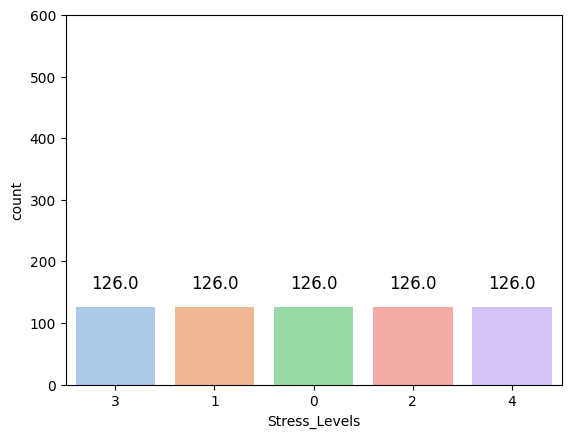

In [ ]:
ax = sns.countplot(x="Stress_Levels", data = stress_f, palette="pastel", order = stress_f['Stress_Levels'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)
plt.show()

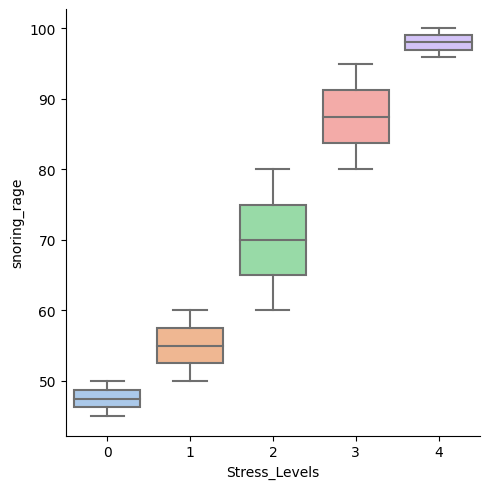

In [8]:
sns.catplot(data=stress_f, x="Stress_Levels", y="snoring_rage", kind="box", palette='pastel')
plt.show()

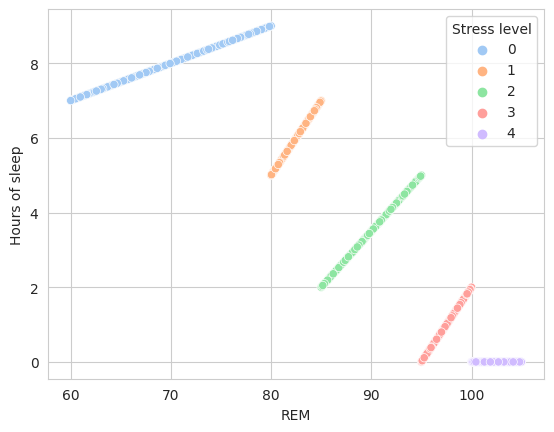

In [40]:
stress_f['body_temperature'] = (stress_f['body_temperature']-32)/1.8
stress_f.head()
ch = sns.scatterplot(data=stress, x="rem", y="sr.1", hue="sl", palette='pastel')
ch.set_xlabel('REM')
ch.set_ylabel('Hours of sleep')
plt.legend(title='Stress level')
plt.show()

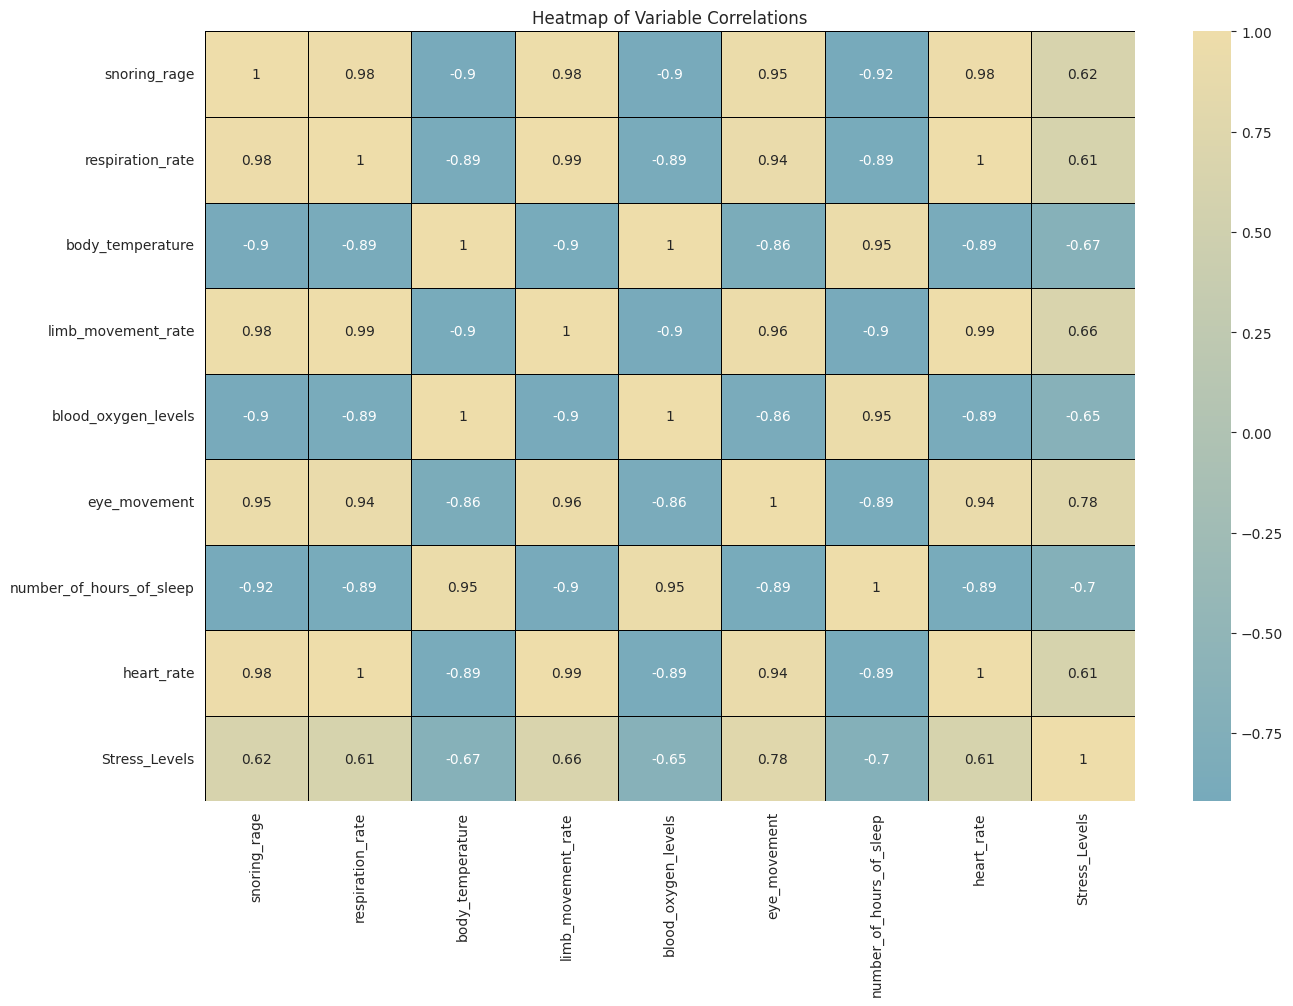

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(stress_f.corr(),cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), linewidths=0.5, linecolor="black", annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

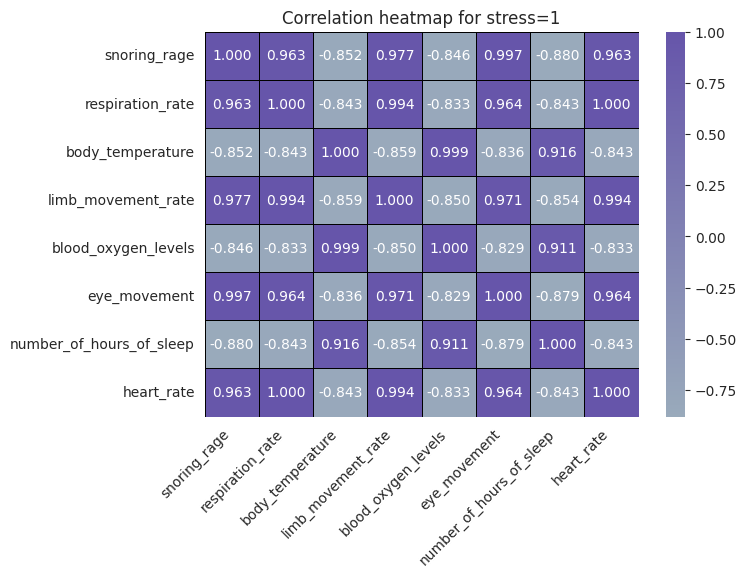

In [50]:
stress_a=stress_f.copy()
stress_f.loc[stress_f['Stress_Levels'] >=1, 'Stress_Levels'] = 1
stress_yes = stress_f[stress_f['Stress_Levels']==1]
stress_no = stress_f[stress_f['Stress_Levels']==0]
plt.figure(figsize = (7,5))
g = sns.heatmap(stress_yes.iloc[:,:-1].corr(), cmap=sns.color_palette("blend:#9AB,#65A", as_cmap=True), linewidths=0.5, linecolor="black", annot = True, fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation heatmap for stress=1')
plt.show()

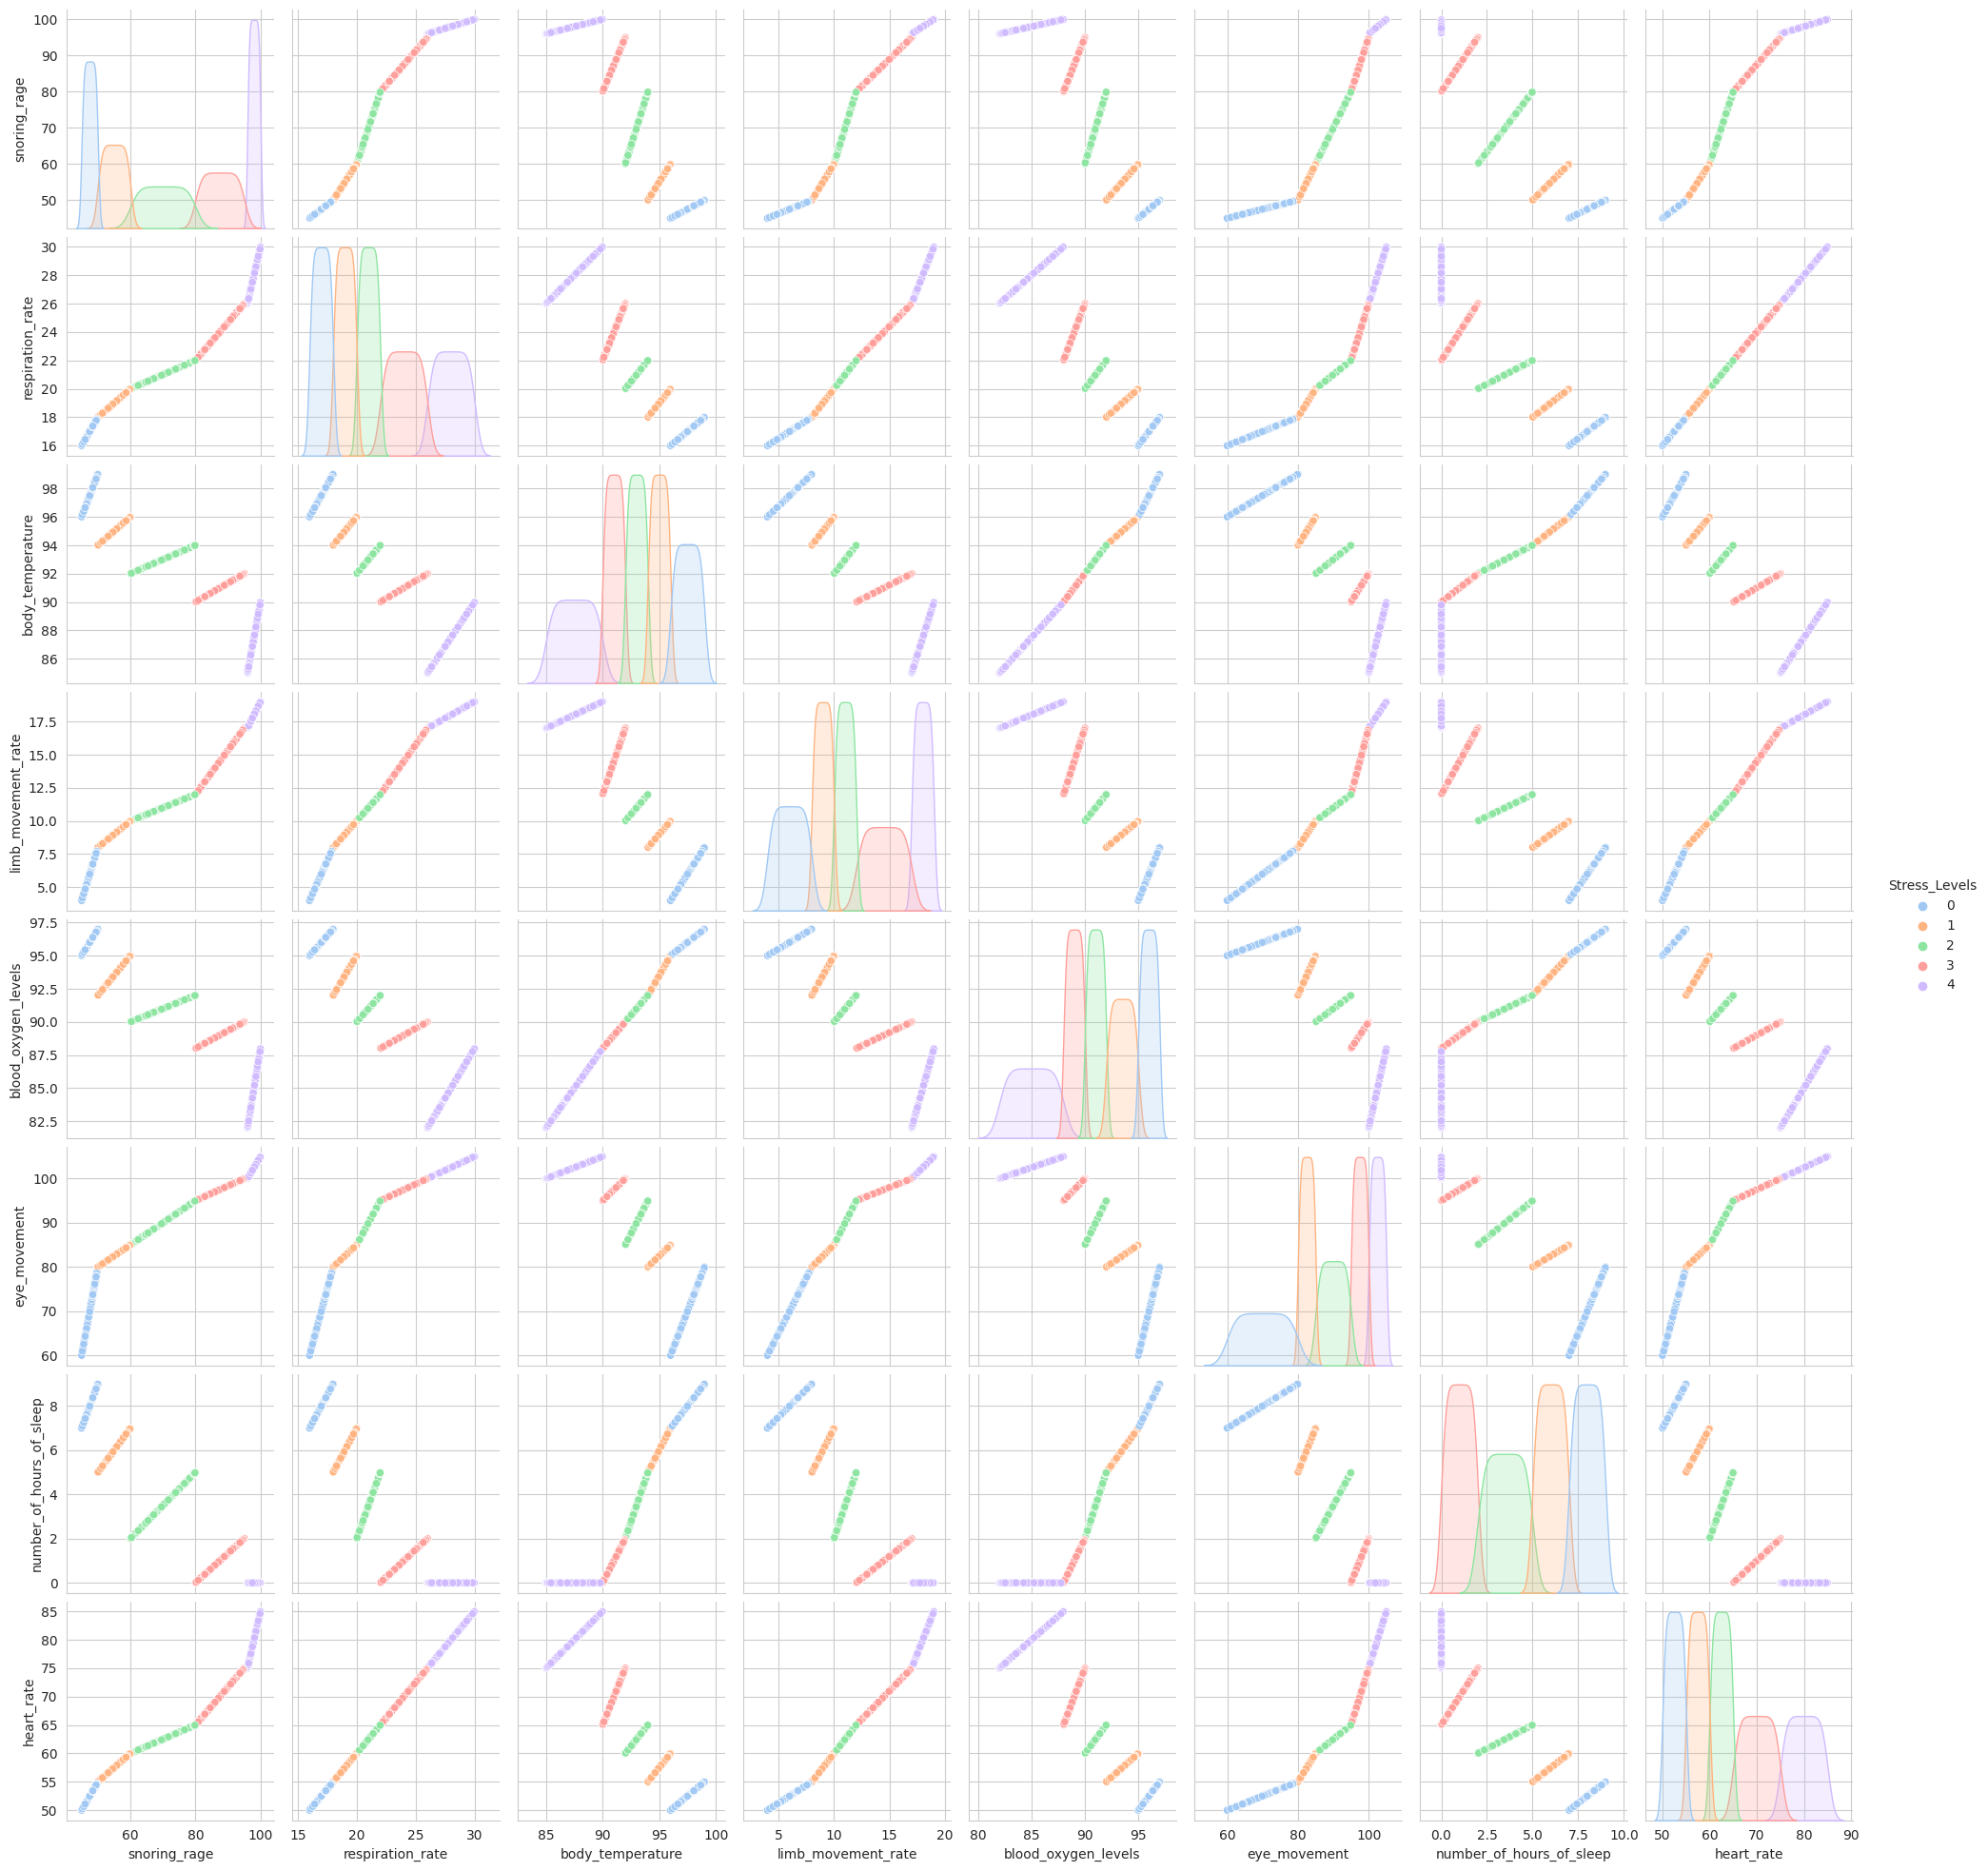

In [51]:
sns.pairplot(stress_a, hue='Stress_Levels', palette = 'pastel')

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        20

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



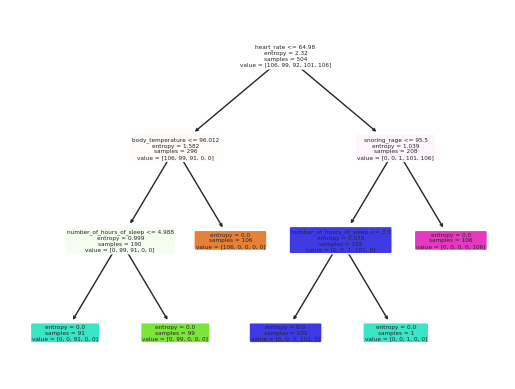

In [53]:
#Decision tree
from sklearn.metrics import classification_report, roc_curve, auc

X = stress_a.iloc[:,:8]
Y = stress_a["Stress_Levels"]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
treee = sklearn.tree.DecisionTreeClassifier(criterion="entropy")
treee.fit(xtrain, ytrain)
feat = ["snoring_rage", "respiration_rate", "body_temperature", "limb_movement_rate", "blood_oxygen_levels", "eye_movement", "number_of_hours_of_sleep", "heart_rate"]

out = sklearn.tree.plot_tree(treee, feature_names=X.columns, filled=True, rounded=True)
Y_pred=treee.predict(xtest)
print(classification_report(ytest, Y_pred))

In [54]:
rfc_best=RandomForestClassifier(criterion='gini',n_estimators=500, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features="sqrt",  random_state=42).fit(xtrain, ytrain)

In [56]:
# naive bayes, log. reg, k-nn, rand forest, grad boost
#xtrain,xtest,ytrain,ytest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from pandas.core.common import random_state

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []

for name, model in models:
  model.fit(xtrain, ytrain)
  Y_pred=model.predict(xtest)
  
  print(f"========================={name}=================================")

  print(classification_report(ytest, Y_pred))
   

=========================KNN=================================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        20

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

=========================NB=================================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        20

    accuracy                           1.00       126
   macro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=========================GB=================================
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        20

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

